# Project 1 Group 2: Financial Investment Analyzer

## Hello, let's begin your financial investment journey by telling us a little about yourself.

In [105]:
#Set up imports for project
import yfinance as yf
import pandas as pd
import hvplot.pandas
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from pathlib import Path
from MCForecastTools import MCSimulation
import holoviews as hv
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### Please press shift + return to proceed.

In [2]:
# Collect client first name, last name and age inputs.

n1 = str(input('Please enter your first name:  '))
n2 = str(input('And your last name:  '))
n3 = int(input('How old are you:  '))

Please enter your first name:   
And your last name:   
How old are you:   34


In [3]:
##Calculate years to retire, based on Fed AuGov requirement of 67 years.
#Print name, age and retirement statement.

ytr = 67 - n3
print(f'Thanks {n1}, as you are {n3} years old and {ytr} years from retirement, we should review a couple of things to give you the best investment recommendation.')

Thanks , as you are 34 years old and 33 years from retirement, we should review a couple of things to give you the best investment recommendation.


In [4]:
print(f"""
{n1}, given you have {ytr} to retirement do you want to invest for:
a) 5 years
b) 10 years
c) 15 years
Please enter either 5, 10 or 15 here:""")
term = int(input())


, given you have 33 to retirement do you want to invest for:
a) 5 years
b) 10 years
c) 15 years
Please enter either 5, 10 or 15 here:


 15


## To help shape your portfolio please chose which statement best reflects your investing comfort zone.
#### (Please note: Option 1 is a stable investment strategy, and 5 has the highest risk, with the potential for higher returns.)

In [6]:
# Outline risk profiles and identify client's risk investment comfort level

print(f"""
{n1} it is important that you are comfortable with how your money is invested and the level of risk and reward. 

More stable investments tend to have lower growth, whilst high growth investments have a higher associated risk. 
Which of the following statements best represents how you feel when investing your money:

1. I do not want to lose my money, I would rather have a low return than risk the loss of any part of my capital.
2. I prefer an amount of stablity, watching the market fluctuate makes me feel sick.
3. I can accept a degree of market fluctation to achieve better results
4. I am willing to accept moderate market fluctuations to achieve better returns.
5. To receive the maximum return on my investment, I am willing to accept a higher investmemt fluctuations and a high degree of risk.

Please choose from the above statements the one which best represents your comfort level.
***Enter between 1-5***""")


risk = str(input('My risk investment comfort level is:'))


 it is important that you are comfortable with how your money is invested and the level of risk and reward. 

More stable investments tend to have lower growth, whilst high growth investments have a higher associated risk. 
Which of the following statements best represents how you feel when investing your money:

1. I do not want to lose my money, I would rather have a low return than risk the loss of any part of my capital.
2. I prefer an amount of stablity, watching the market fluctuate makes me feel sick.
3. I can accept a degree of market fluctation to achieve better results
4. I am willing to accept moderate market fluctuations to achieve better returns.
5. To receive the maximum return on my investment, I am willing to accept a higher investmemt fluctuations and a high degree of risk.

Please choose from the above statements the one which best represents your comfort level.
***Enter between 1-5***


My risk investment comfort level is: 2


In [7]:
print(f"Thank you {n1},now let's look at the balance of shares in risk profile {risk}.")

Thank you ,now let's look at the balance of shares in risk profile 2.


In [8]:
#Apply a pre determined risk weighting matrix
import numpy as np
import pandas as pd
from pathlib import Path

risk_options = Path('Resources/Risk_Level_Recommendations.csv')

risk_df = pd.read_csv(risk_options)

risk_df.head(7)

,Unnamed: 0,LOW,LOW.1,LOW.2,MOD,MOD.1,MOD.2,MOD.3,HIGH,HIGH.1,HIGH.2
0,NaN,A,B,C,D,E,F,G,H,I,J
1,R1 (LOW),0.2,0.2,0.2,0.15,0.1,0.05,0.05,0.02,0.02,0.01
2,R2 (MOD),0.2,0.2,0.15,0.15,0.15,0.1,0.02,0.01,0.01,0.01
3,R3 (MED),0.15,0.15,0.15,0.15,0.12,0.12,0.1,0.02,0.02,0.02
4,R4 (CONF),0.01,0.01,0.01,0.02,0.1,0.15,0.15,0.15,0.2,0.2
5,R5 (U CONF),0.01,0.02,0.02,0.05,0.05,0.1,0.15,0.2,0.2,0.2


In [9]:
#Assign stock weights based on client's risk appetite

R = int(risk)

R1 = [0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0.05, 0.02, 0.02, 0.01]
R2 = [0.2, 0.2, 0.15, 0.15, 0.15, 0.1, 0.02, 0.01, 0.01, 0.01]
R3 = [0.15, 0.15, 0.15, 0.15, 0.12, 0.12, 0.1, 0.02, 0.02, 0.02]
R4 = [0.01, 0.01, 0.01, 0.02, 0.1, 0.15, 0.15, 0.15, 0.2, 0.2]
R5 = [0.01, 0.02, 0.02, 0.05, 0.05, 0.1, 0.15, 0.2, 0.2, 0.2]

if R == 1:
    y=np.array(R1)
    print(R1)
elif R == 2:
    y=np.array(R2)
    print(R2)
elif R == 3:
    y=np.array(R3)
    print(R3)
elif R == 4:
    y=np.array(R4)
    print(R4)
elif R == 5:
    y=np.array(R5)

if R == 1:
    weights = [0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0.05, 0.02, 0.02, 0.01]
elif R == 2:
    weights = [0.2, 0.2, 0.15, 0.15, 0.15, 0.1, 0.02, 0.01, 0.01, 0.01]
elif R == 3:
    weights = [0.15, 0.15, 0.15, 0.15, 0.12, 0.12, 0.1, 0.02, 0.02, 0.02]
elif R == 4:
    weights = [0.01, 0.01, 0.01, 0.02, 0.1, 0.15, 0.15, 0.15, 0.2, 0.2]
elif R == 5:
    weights = [0.01, 0.02, 0.02, 0.05, 0.05, 0.1, 0.15, 0.2, 0.2, 0.2]

[0.2, 0.2, 0.15, 0.15, 0.15, 0.1, 0.02, 0.01, 0.01, 0.01]


, the risk profile you selected allocates weights to the portfolio as shown here.


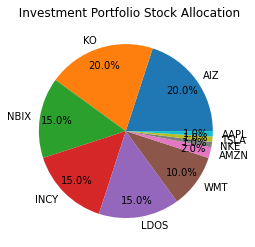

In [10]:
#graph the share investment weights for the client's seletced risk level appetite 
# Create our portfolio of equities
#creating a list of stocks
tickers_list = ['AIZ','KO','NBIX','INCY','LDOS','WMT','AMZN','NKE', 'TSLA','AAPL']

plt.pie(y, labels = tickers_list, autopct='%.1f%%', pctdistance=0.8)
plt.title(f'{n1} {n2} Investment Portfolio Stock Allocation')
plt.show
print(f'{n1}, the risk profile you selected allocates weights to the portfolio as shown here.')
plt.savefig(f"{n1} {n2} Investment Portfolio Stock Allocation")

### Correltation of Shares

### Get price info

In [11]:
price_data = pdr.get_data_yahoo(tickers_list,
                               start = '2018-01-01',
                               end = '2022-03-01')
price_data = price_data['Close']

price_data.head()

Symbols,AIZ,KO,NBIX,INCY,LDOS,WMT,AMZN,NKE,TSLA,AAPL
Date,,,,,,,,,,
2018-01-02,99.230003,45.540001,79.300003,100.889999,64.000000,98.589996,59.450500,63.490002,21.368668,43.064999
2018-01-03,99.510002,45.439999,82.980003,100.980003,63.919998,99.449997,60.209999,63.480000,21.150000,43.057499
2018-01-04,100.050003,46.080002,80.279999,98.440002,64.800003,99.540001,60.479500,63.439999,20.974667,43.257500
2018-01-05,101.309998,46.070000,81.730003,99.849998,64.730003,100.129997,61.457001,63.980000,21.105333,43.750000
2018-01-08,99.699997,46.000000,77.809998,100.809998,66.379997,101.610001,62.343498,64.550003,22.427334,43.587502


In [12]:
# Calculate daily returns
returns = price_data.pct_change()[1:]

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

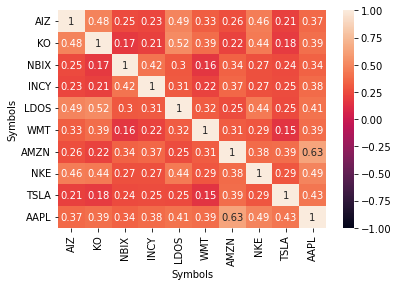

In [19]:
# Correlation of each stock pair
correlation = returns.corr()
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=-1, vmax=1, annot = True)

In [13]:
print(f"Okay {n1},let's take the next step.")
initial_investment = int(input('Please enter how much you want to invest in your portfolio: $'))


Okay ,let's take the next step.


Please enter how much you want to invest in your portfolio: $ 1000000


In [25]:
# Set the path of the CSV files
riskfreerate_path= Path("Resources/risk_free_rate.csv")
# Read in data
risk_free_rate = pd.read_csv(riskfreerate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [26]:
#Here we are fetching all the initial ticker data 
# Fetch high growth ticker data
aapl = yf.Ticker("AAPL")
tsla = yf.Ticker("TSLA")
nke = yf.Ticker("NKE")
amzn = yf.Ticker("AMZN")
wmt = yf.Ticker("WMT")
# Fetch low volatility ticker data
ldos = yf.Ticker("LDOS")
incy = yf.Ticker("INCY")
nbix = yf.Ticker("NBIX")
ko = yf.Ticker("KO")
aiz = yf.Ticker("AIZ")

In [27]:
# get historical market data for high growth ticker data
hist_appl = aapl.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_tsla = tsla.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_nke = nke.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_amzn = amzn.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_wmt = wmt.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
# get historical market data for low volatility ticker data
hist_ldos = ldos.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_incy = incy.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_nbix = nbix.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_ko = ko.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
hist_aiz = aiz.history(period="MAX").drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])

In [28]:
#Joining all historical data
his_stock_data = pd.concat([hist_appl, hist_tsla, hist_nke, hist_amzn, hist_wmt, hist_ldos, hist_incy, hist_nbix, hist_ko, hist_aiz], axis = 1, 
                           join="inner", keys=["AAPL", "TSLA", "NKE", "AMZN", "WMT", "IDOS", "INCY", "NBIX", "KO", "AIZ"])
his_stock_data = his_stock_data.rename(columns={'Close': ''})

his_stock_data

,AAPL,TSLA,NKE,AMZN,WMT,IDOS,INCY,NBIX,KO,AIZ
,,,,,,,,,,
Date,,,,,,,,,,
2010-06-29,7.811646,1.592667,14.751129,5.430500,36.921967,21.797009,11.240000,5.520000,17.239729,27.268602
2010-06-30,7.670155,1.588667,14.616973,5.463000,36.295284,21.693333,11.070000,5.600000,17.167793,27.120108
2010-07-01,7.577149,1.464000,14.729499,5.548000,36.499142,21.447109,10.560000,5.730000,17.136971,26.971609
2010-07-02,7.530190,1.280000,14.684054,5.457000,36.242432,21.291609,10.720000,5.700000,17.143824,26.721510
2010-07-06,7.581723,1.074000,14.543401,5.503000,36.672798,21.382317,10.760000,5.360000,17.273983,26.877821
...,...,...,...,...,...,...,...,...,...,...
2022-09-28,149.839996,287.809998,98.699997,118.010002,133.110001,88.930000,67.660004,102.830002,56.980000,149.460007
2022-09-29,142.479996,268.209991,95.330002,114.800003,132.250000,88.099998,66.610001,102.760002,56.570000,147.750000


In [30]:
# Calculate daily returns for each portfolio
pct_stock_data = his_stock_data.pct_change().dropna()
all_portfolios_returns = pd.concat([pct_stock_data, risk_free_rate], axis="columns", join="inner", ignore_index=True)
all_portfolios_returns.tail()

,0,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-11-27,0.004826,0.020488,-0.009517,0.003224,-0.001515,-0.003507,0.025752,0.004626,-0.004345,-0.008375,0.000010
2020-11-30,0.021100,-0.031002,0.003352,-0.008544,0.007850,-0.015448,0.015496,-0.006488,-0.013196,-0.034905,0.000009
2020-12-01,0.030827,0.030233,0.005494,0.016427,-0.000982,0.009335,0.010409,-0.001159,0.008527,0.017348,0.000010
2020-12-02,0.002934,-0.027259,0.001034,-0.005140,-0.013889,0.014365,-0.036877,0.024676,0.001345,0.001675,0.000010
2020-12-03,-0.001137,0.043177,0.010179,-0.005244,-0.008105,-0.002037,0.007658,0.016466,0.012857,0.004560,0.000009


In [ ]:
# Calculate Sharpe Ratio
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns[10].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios_df = pd.DataFrame(sharpe_ratios)

In [70]:
tickers_list = ["AAPL", "TSLA", "NKE", "AMZN", "WMT", "LDOS", "INCY", "NBIX", "KO", "AIZ"]
risk_df = []

for ticker in tickers_list:
    result = yf.Ticker(ticker).info
    row_items = [result['symbol'], result['currentRatio'], result['quickRatio'], result['beta'], result['profitMargins'], result['revenueGrowth'], result['operatingMargins']] 
    risk_df.append(row_items)
    

risk_df = pd.DataFrame(risk_df, columns=['symbol', 'Current Ratio', 'Quick Ratio', 'Beta', 'profitMargins', 'revenueGrowth', 'operatingMargins'])
risk_df.rename(columns={'symbol':'Tickers'},inplace=True)

In [72]:
all_risk_df = pd.concat([risk_df, sharpe_ratios_df], axis="columns", join="inner" )
all_risk_df

,Tickers,Current Ratio,Quick Ratio,Beta,profitMargins,revenueGrowth,operatingMargins,Sharpe Ratio
0,AAPL,0.865,0.697,1.234119,0.25709,0.019,0.30533,1.002514
1,TSLA,1.431,0.968,2.186576,0.14168,0.416,0.16139,1.062364
2,NKE,2.645,1.542,1.028765,0.11962,0.036,0.13247,0.892881
3,AMZN,0.953,0.679,1.333200,0.02389,0.072,0.03148,1.110321
4,WMT,0.842,0.215,0.528965,0.02360,0.084,0.04058,0.678359
5,LDOS,0.998,0.777,0.723286,0.05195,0.054,0.08127,0.600419
6,INCY,3.710,3.506,0.658152,0.29955,0.213,0.19866,0.617338
7,NBIX,4.017,3.662,0.638143,0.05913,0.313,0.14857,0.746259
8,KO,1.127,0.785,0.557684,0.23162,0.118,0.28747,0.565434
9,AIZ,0.432,0.145,0.550021,0.13234,0.021,0.08727,0.650370


In [122]:
individual_risk_df_plot = all_risk_df.hvplot.bar(
    groupby='Tickers', 
    label="Individual Company Health Metrics",
    rot=30,
    height=500,
    width=1000,
).opts(
    yformatter='%.0f',
    color="purple",
    hover_color="orange" 
)
individual_risk_df_plot * hv.HLine(1)

:DynamicMap   [Tickers]
   :Bars   [index,Variable]   (value)

In [106]:
all_risk_df_plot = all_risk_df.hvplot.bar(
    label="All Company Health Metrics",
    rot=90,
    height=500,
    width=1000,
    xlabel="AAPL                TSLA                  NKE                  AMZN                  WMT                LDOS                  INCY                  NBIX                  KO                  AIZ"
).opts(
    yformatter='%.0f',
    hover_color="orange" 
)

all_risk_df_plot * hv.HLine(1)

:Bars   [index,Variable]   (value)

In [50]:
df_list = list()
for ticker in tickers_list:
    data = yf.download(ticker, group_by="Ticker", period='5y')
    # add this column because the dataframe doesn't contain a column with the ticker
    data['ticker'] = ticker 
    df_list.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
# combining dataframes
df_ticker = pd.concat(df_list)
df_ticker.sort_values (by = ['ticker'])

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2017-10-04,38.407501,38.465000,38.115002,38.369999,36.415642,80655200,AAPL
2021-02-09,136.619995,137.880005,135.850006,136.009995,134.820755,76774200,AAPL
2021-02-08,136.029999,136.960007,134.919998,136.910004,135.712891,71297200,AAPL
2021-02-05,137.350006,137.419998,135.860001,136.759995,135.564194,75693800,AAPL
2021-02-04,136.300003,137.399994,134.589996,137.389999,135.985489,84183100,AAPL
...,...,...,...,...,...,...,...
2019-06-04,102.610001,102.650002,101.440002,102.559998,97.212082,5964900,WMT
2019-06-03,101.629997,102.680000,101.400002,101.959999,96.643372,6614700,WMT
2019-05-31,101.349998,102.019997,100.599998,101.440002,96.150490,5927500,WMT


In [35]:
# Reorganize the DataFrame
# Separate ticker data
AAPL = df_ticker[df_ticker['ticker']=='AAPL'].drop('ticker', axis=1)
AIZ = df_ticker[df_ticker['ticker']=='AIZ'].drop('ticker', axis=1)
AMZN = df_ticker[df_ticker['ticker']=='AMZN'].drop('ticker', axis=1)
INCY = df_ticker[df_ticker['ticker']=='INCY'].drop('ticker', axis=1)
KO = df_ticker[df_ticker['ticker']=='KO'].drop('ticker', axis=1)
LDOS = df_ticker[df_ticker['ticker']=='LDOS'].drop('ticker', axis=1)
NBIX = df_ticker[df_ticker['ticker']=='NBIX'].drop('ticker', axis=1)
NKE = df_ticker[df_ticker['ticker']=='NKE'].drop('ticker', axis=1)
TSLA = df_ticker[df_ticker['ticker']=='TSLA'].drop('ticker', axis=1)
WMT = df_ticker[df_ticker['ticker']=='WMT'].drop('ticker', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AAPL, AIZ, AMZN, INCY, KO, LDOS, NBIX, NKE, TSLA, WMT], axis=1,
                      keys=["AAPL", "AIZ", "AMZN", "INCY", "KO", "LDOS", "NBIX", "NKE",
                           "TSLA", "WMT"])

# Display sample data
df_ticker

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2017-10-04   38.407501   38.465000   38.115002   38.369999   36.415642   
2017-10-05   38.544998   38.860001   38.512501   38.847500   36.868809   
2017-10-06   38.742500   38.872501   38.639999   38.825001   36.847466   
2017-10-09   38.952499   39.182499   38.872501   38.959999   36.975590   
2017-10-10   39.014999   39.500000   38.775002   38.974998   36.989826   
...                ...         ...         ...         ...         ...   
2022-09-27  152.740005  154.720001  149.949997  151.759995  151.759995   
2022-09-28  147.639999  150.639999  144.839996  149.839996  149.839996   
2022-09-29  146.100006  146.720001  140.679993  142.479996  142.479996   
2022-09-30  141.279999  143.100006  138.000000  138.199997  138.199997   
2022-10-03  138.210007  143.070007  137.690002  142.449997  142.449997   

                              AIZ                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2017-10-04   80655200   95.570000   95.949997   94.900002   95.290001  ...   
2017-10-05   85135200   95.209999   96.160004   95.209999   95.489998  ...   
2017-10-06   69630400   95.849998   96.169998   95.290001   96.040001  ...   
2017-10-09   65051600   96.000000   96.040001   95.180000   95.599998  ...   
2017-10-10   62468000   95.650002   95.889999   95.059998   95.820000  ...   
...               ...         ...         ...         ...         ...  ...   
2022-09-27   84442700  147.339996  148.500000  145.539993  147.460007  ...   
2022-09-28  146691400  148.460007  150.410004  148.059998  149.460007  ...   
2022-09-29  128138200  148.690002  149.350006  146.380005  147.750000  ...   
2022-09-30  124705400  148.130005  149.350006  145.020004  145.270004  ...   
2022-10-03  114169700  146.759995  150.059998  145.259995  149.679993  ...   

                  TSLA                                            WMT  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2017-10-04   23.306667   23.667334   23.667334  122452500   79.269997   
2017-10-05   23.423332   23.688667   23.688667   62575500   79.169998   
2017-10-06   23.483334   23.792000   23.792000   64462500   78.779999   
2017-10-09   22.844667   22.862667   22.862667  112405500   79.500000   
2017-10-10   23.035334   23.705999   23.705999  104677500   82.680000   
...                ...         ...         ...        ...         ...   
2022-09-27  277.510010  282.940002  282.940002   61925200  132.229996   
2022-09-28  277.570007  287.809998  287.809998   54664800  131.410004   
2022-09-29  265.779999  268.209991  268.209991   77620600  133.500000   
2022-09-30  262.470001  265.250000  265.250000   67517800  132.240005   
2022-10-03  241.009995  242.399994  242.399994   98081700  130.240005   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2017-10-04   79.779999   79.070000   79.089996   72.071205   6173400  
2017-10-05   79.809998   79.080002   79.410004   72.362816   5138700  
2017-10-06   79.169998   78.250000   79.000000   71.989212   6246700  
2017-10-09   81.379997   79.400002   80.529999   73.383423  13493000  
2017-10-10   84.879997   82.610001   84.129997   76.663948  25124000  
...                ...         ...         ...         ...       ...  
2022-09-27  133.429993  130.300003  130.949997  130.949997   5723900  
2022-09-28  133.649994  129.720001  133.110001  133.110001   5612800  
2022-09-29  134.119995  131.630005  132.250000  132.250000   5080500  
2022-09-30  1

In [36]:
#rename close column so monte carlo sim library picks it up
df_ticker = df_ticker.rename(columns={'Close': 'close'})

df_ticker.head(1)

AAPL                                                     \
                 Open    High        Low      close  Adj Close    Volume   
Date                                                                       
2017-10-04  38.407501  38.465  38.115002  38.369999  36.415642  80655200   

              AIZ                                   ...       TSLA             \
             Open       High        Low      close  ...        Low      close   
Date                                                ...                         
2017-10-04  95.57  95.949997  94.900002  95.290001  ...  23.306667  23.667334   

                                        WMT                               \
            Adj Close     Volume       Open       High    Low      close   
Date                                                                       
2017-10-04  23.667334  122452500  79.269997  79.779999  79.07  79.089996   

                                
            Adj Close   Volume  
Date                            
2017-10-04  72.071205  6173400  

[1 rows x 60 columns]

In [37]:
# Configuring a Monte Carlo simulation of chosen portfolio to forecast five years cumulative returns
MC_port = MCSimulation(
    portfolio_data = df_ticker,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*term
)

In [38]:
# Printing the simulation input data
MC_port.portfolio_data.head()

AAPL                                                        \
                 Open       High        Low      close  Adj Close    Volume   
Date                                                                          
2017-10-04  38.407501  38.465000  38.115002  38.369999  36.415642  80655200   
2017-10-05  38.544998  38.860001  38.512501  38.847500  36.868809  85135200   
2017-10-06  38.742500  38.872501  38.639999  38.825001  36.847466  69630400   
2017-10-09  38.952499  39.182499  38.872501  38.959999  36.975590  65051600   
2017-10-10  39.014999  39.500000  38.775002  38.974998  36.989826  62468000   

                               AIZ                        ...       TSLA  \
           daily_return       Open       High        Low  ...  Adj Close   
Date                                                      ...              
2017-10-04          NaN  95.570000  95.949997  94.900002  ...  23.667334   
2017-10-05     0.012445  95.209999  96.160004  95.209999  ...  23.688667   
2017-10-06    -0.000579  95.849998  96.169998  95.290001  ...  23.792000   
2017-10-09     0.003477  96.000000  96.040001  95.180000  ...  22.862667   
2017-10-10     0.000385  95.650002  95.889999  95.059998  ...  23.705999   

                                          WMT                        \
               Volume daily_return       Open       High        Low   
Date                                                                  
2017-10-04  122452500          NaN  79.269997  79.779999  79.070000   
2017-10-05   62575500     0.000901  79.169998  79.809998  79.080002   
2017-10-06   64462500     0.004362  78.779999  79.169998  78.250000   
2017-10-09  112405500    -0.039061  79.500000  81.379997  79.400002   
2017-10-10  104677500     0.036887  82.680000  84.879997  82.610001   

                                                         
                close  Adj Close    Volume daily_return  
Date                                                     
2017-10-04  79.089996  72.071205   6173400          NaN  
2017-10-05  79.410004  72.362816   5138700     0.004046  
2017-10-06  79.000000  71.989212   6246700    -0.005163  
2017-10-09  80.529999  73.383423  13493000     0.019367  
2017-10-10  84.129997  76.663948  25124000     0.044704  

[5 rows x 70 columns]

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\henry\weeks\awhaleofaportfolio\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

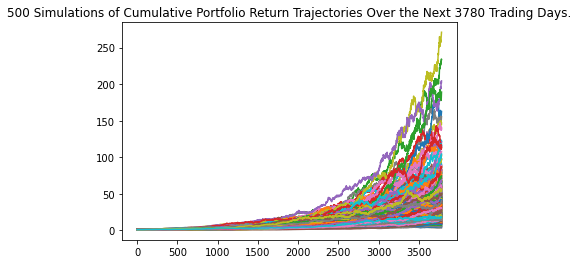

In [39]:
line_plot_port = MC_port.plot_simulation()

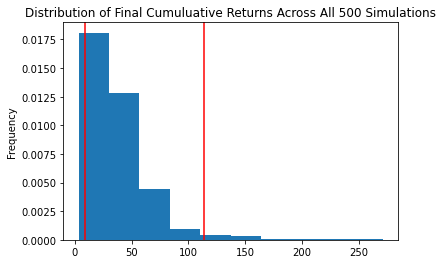

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_port = MC_port.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_port = MC_port.summarize_cumulative_return()

# Print summary statistics
print(tbl_port)

count           500.000000
mean             38.573420
std              29.446377
min               3.397599
25%              19.540975
50%              30.978961
75%              47.976325
max             270.940259
95% CI Lower      9.099717
95% CI Upper    113.333879
Name: 3780, dtype: float64


### S&P 500 Montecarlo Sim

In [42]:
# Get S&P 500 price data
SP500_data = yf.download("SPY", group_by="Ticker", period='5y')

# Rename close column so monte carlo sim library picks it up
SP500_data = SP500_data.rename(columns={'Close': 'close'})

# Add ticker column
SP500_data['ticker'] = "SPY"

SP500_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,close,Adj Close,Volume,ticker
Date,,,,,,,
2017-10-04,252.690002,253.440002,252.559998,253.160004,232.314468,55953600,SPY
2017-10-05,253.539993,254.679993,253.199997,254.660004,233.690964,63522800,SPY
2017-10-06,254.149994,254.699997,253.850006,254.369995,233.424850,80646000,SPY
2017-10-09,254.630005,254.699997,253.649994,253.949997,233.039413,35803100,SPY
2017-10-10,254.600006,255.050003,253.979996,254.619995,233.654236,43057400,SPY


In [43]:
# Separate ticker data
SP500 = SP500_data[SP500_data['ticker']=='SPY'].drop('ticker', axis=1)

# Concatenate the ticker DataFrames
SP500 = pd.concat([SP500], axis=1, keys=["SPY"])

In [44]:
# Configuring a Monte Carlo simulation of chosen portfolio to forecast five years cumulative returns
MC_port_snp = MCSimulation(
    portfolio_data = SP500,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*term
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\henry\weeks\awhaleofaportfolio\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

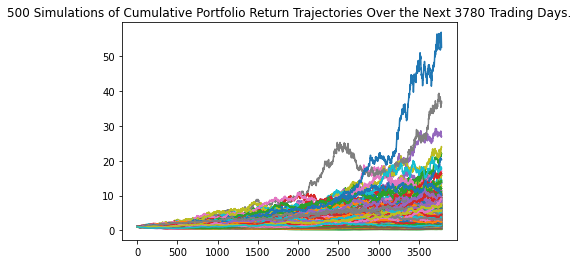

In [45]:
# Plot simulation outcomes
line_plot_SP500 = MC_port_snp.plot_simulation()

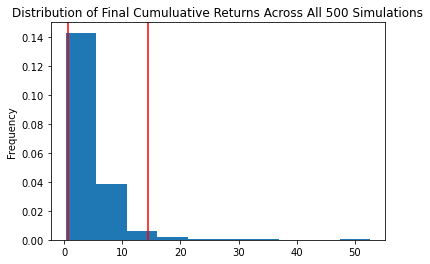

In [46]:
# Plot probability distribution and confidence intervals
dist_plot_SP500 = MC_port_snp.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_SP500 = MC_port_snp.summarize_cumulative_return()

# Print summary statistics
print(tbl_SP500)

count           500.000000
mean              4.394217
std               4.433909
min               0.284122
25%               1.811807
50%               3.278787
75%               5.530885
max              52.646431
95% CI Lower      0.591226
95% CI Upper     14.448365
Name: 3780, dtype: float64


### Montecarlo Sim Comparisons

In [48]:
## Compare summary statistics

table_data = {'Portfolio' : [round(tbl_port[1]*initial_investment,2),round(tbl_port[2],5), round(tbl_port[3]*initial_investment,2),
                             round(tbl_port[7]*initial_investment,2), round(tbl_port[8]*initial_investment,2),
                             round(tbl_port[9]*initial_investment,2)],
              'S&P 500' : [round(tbl_SP500[1]*initial_investment,2), round(tbl_SP500[2],5), round(tbl_SP500[3]*initial_investment,2), 
                           round(tbl_SP500[7]*initial_investment,2), round(tbl_SP500[8]*initial_investment,2), 
                           round(tbl_SP500[9]*initial_investment,2)],
              'Statistic' : ["Expected Return", "Standard Deviation", "Minimum", "Maximum", "95% CI Lower", "95% CI Upper"]
             }

table_data_df = pd.DataFrame(table_data).set_index('Statistic')
            

table_data_df

,Portfolio,S&P 500
Statistic,,
Expected Return,3.857342e+06,4.394217e+05
Standard Deviation,2.944638e+01,4.433910e+00
Minimum,3.397599e+05,2.841223e+04
Maximum,2.709403e+07,5.264643e+06
95% CI Lower,9.099717e+05,5.912264e+04
95% CI Upper,1.133339e+07,1.444837e+06


In [49]:
# Compare expected return
print("The expected return of your portfolio is", (round(tbl_port[1]-1,3)*100), "%.")
print("The expected return of the S&P 500  is", round(tbl_SP500[1]-1,3)*100, "%.")

if tbl_port[1] > tbl_SP500[1]:
    print("Your portfolio is expected to beat the S&P 500 by", round((tbl_port[1]-1)*100 - (tbl_SP500[1]-1)*100 ,3), "%.")
else: 
    print("The S&P 500 is expected to beat your portfolio by", round((tbl_port[1]-1)*100 - (tbl_SP500[1]-1)*100 ,3), "%.")

if tbl_port[1] > 1:
    print("From your initial investment  of $" + str(initial_investment) + ", your total expected portfolio value is $" + str(initial_investment*tbl_port[1]) + " therefore a gain of $" + str(initial_investment*tbl_port[1]-initial_investment))
else:
    print("From your initial investment  of $" + str(initial_investment) + ", your total expected portfolio value is $"+ str(initial_investment*tbl_port[1]) + " therefore a loss of $" + str(initial_investment*tbl_port[1]-initial_investment))


The expected return of your portfolio is 3757.3 %.
The expected return of the S&P 500  is 339.40000000000003 %.
Your portfolio is expected to beat the S&P 500 by 3417.92 %.
From your initial investment  of $100000, your total expected portfolio value is $3857341.973479198 therefore a gain of $3757341.973479198


In [50]:
# Compare standard deviation

print("The expected standard deviation of your portfolio is", round(tbl_port[2],3))
print("The expected standard deviation of the S&P 500  is", round(tbl_SP500[2],3))

if tbl_port[2] > tbl_SP500[2]:
    print("As your expected standard deviation is higher than the S&P 500 there is more volatility in your portfolio, hence there is more risk you are taking on.")
else:
    print("As your expected standard deviation is lower than the S&P 500 there is less volatility in your portfolio, hence less risk you are taking on.")

The expected standard deviation of your portfolio is 29.446
The expected standard deviation of the S&P 500  is 4.434
As your expected standard deviation is higher than the S&P 500 there is more volatility in your portfolio, hence there is more risk you are taking on.


### Initial Investment Returns Comparison

<AxesSubplot:title={'center':'Returns of Portfolio and S&P 500 vs Initial Investment'}, ylabel='Dollars (USD)'>

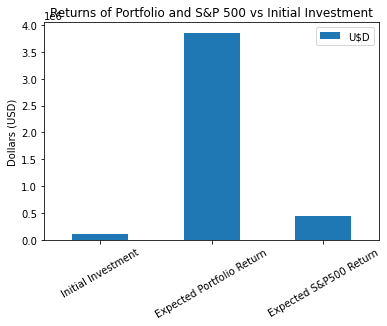

In [51]:
expected_return_port = tbl_port[1]*initial_investment
expected_return_SP500 = tbl_SP500[1]*initial_investment

# Create dictionary

data_returns = {"X":["Initial Investment", "Expected Portfolio Return", "Expected S&P500 Return"],

        "U$D":[initial_investment, (expected_return_port), (expected_return_SP500)]

        }

# Convert dictionary to dataframe

data_returns_df = pd.DataFrame(data=data_returns)

# Bar chart

data_returns_df.plot.bar(x = "X", y = "U$D", rot = 30, title = "Returns of Portfolio and S&P 500 vs Initial Investment", xlabel = ""
                        ,ylabel = "Dollars (USD)")

## Calculating Alpha & Beta

In [52]:
# Get price info

price_data = pdr.get_data_yahoo(tickers_list,
                               start = '2018-01-01',
                               end = '2022-03-01')
price_data = price_data['Close']

price_data.head()

Symbols,AAPL,TSLA,NKE,AMZN,WMT,LDOS,INCY,NBIX,KO,AIZ
Date,,,,,,,,,,
2018-01-02,43.064999,21.368668,63.490002,59.450500,98.589996,64.000000,100.889999,79.300003,45.540001,99.230003
2018-01-03,43.057499,21.150000,63.480000,60.209999,99.449997,63.919998,100.980003,82.980003,45.439999,99.510002
2018-01-04,43.257500,20.974667,63.439999,60.479500,99.540001,64.800003,98.440002,80.279999,46.080002,100.050003
2018-01-05,43.750000,21.105333,63.980000,61.457001,100.129997,64.730003,99.849998,81.730003,46.070000,101.309998
2018-01-08,43.587502,22.427334,64.550003,62.343498,101.610001,66.379997,100.809998,77.809998,46.000000,99.699997


In [53]:
# Calculate daily returns

returns = price_data.pct_change()[1:]

returns.head()

Symbols,AAPL,TSLA,NKE,AMZN,WMT,LDOS,INCY,NBIX,KO,AIZ
Date,,,,,,,,,,
2018-01-03,-0.000174,-0.010233,-0.000158,0.012775,0.008723,-0.001250,0.000892,0.046406,-0.002196,0.002822
2018-01-04,0.004645,-0.008290,-0.000630,0.004476,0.000905,0.013767,-0.025154,-0.032538,0.014085,0.005427
2018-01-05,0.011385,0.006230,0.008512,0.016163,0.005927,-0.001080,0.014323,0.018062,-0.000217,0.012594
2018-01-08,-0.003714,0.062638,0.008909,0.014425,0.014781,0.025490,0.009614,-0.047963,-0.001519,-0.015892
2018-01-09,-0.000115,-0.008085,-0.007126,0.004676,-0.012007,-0.002109,-0.044837,0.022234,0.005000,-0.005918


In [54]:
# Calculate portfolio return

portfolio_return = (returns * weights).sum(axis = 1)

portfolio_return.head()

Date
2018-01-03    0.010281
2018-01-04   -0.004865
2018-01-05    0.009641
2018-01-08   -0.006230
2018-01-09   -0.003345
dtype: float64

In [55]:
# Get benchmark returns (S&P 500)

benchmark_price = pdr.get_data_yahoo('SPY',
                               start = '2018-01-01',
                               end = '2022-03-01')
                               
benchmark_return = benchmark_price["Close"].pct_change()[1:]

benchmark_return.head()

Date
2018-01-03    0.006325
2018-01-04    0.004215
2018-01-05    0.006664
2018-01-08    0.001829
2018-01-09    0.002263
Name: Close, dtype: float64

C:\Users\henry\anaconda3\envs\dev1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Portfolio vs S&P500 Returns')

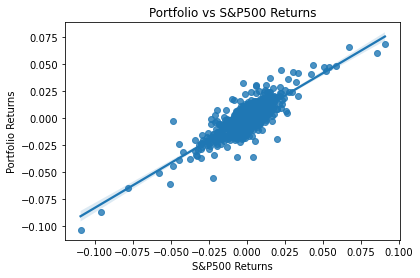

In [56]:
# Plot beta against benchmark

sns.regplot(benchmark_return.values, portfolio_return.values)
plt.xlabel("S&P500 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio vs S&P500 Returns")

In [57]:
# Use linear regression model to calculate beta/alpha

(beta, alpha) = stats.linregress(benchmark_return.values,
                portfolio_return.values)[0:2]

print("Portfolio beta is", round(beta, 5))
print("Portfolio alpha is", round(alpha, 5))

Portfolio beta is 0.83163
Portfolio alpha is 9e-05


In [58]:
print("For every 1% move in the S&P 500, your portfolio will move",  round(1+alpha, 5),"%.")
print("Portfolio beta is", round(beta,5), "meaning your portfolio is less volatile than the S&P 500 by", 
    round((1-beta)*100,5), "%")

For every 1% move in the S&P 500, your portfolio will move 1.00009 %.
Portfolio beta is 0.83163 meaning your portfolio is less volatile than the S&P 500 by 16.83674 %


### Current Standard Deviation


In [59]:
# Calculate standard deviation of own portfolio

portfolio_std = benchmark_return.values.std()

# Calculate standard devation of S&P 500.

SP500_std = portfolio_return.values.std()


In [60]:
# Check to see which is riskier
print("Your current portfolio standard deviation is " + str(round(portfolio_std, 5)))
print("Current S&P 500 standard deviation is " + str(round(SP500_std, 5)))

if portfolio_std > SP500_std:
    print("Currently, your portfolio is risker than S&P 500")
else: 
    print("Currently, the S&P 500 is riskier than your portfolio")

Your current portfolio standard deviation is 0.01316
Current S&P 500 standard deviation is 0.01317
Currently, the S&P 500 is riskier than your portfolio
